In [1]:
import numpy
import h5py
import time
import os, sys
import random
from collections import OrderedDict
import itertools
import matplotlib.pyplot as plt
import argparse

In [2]:
input_file = '/mnt/scratch/micall12/training_files/Level5p_IC86.2013_genie_nue.012640.300.hdf5'

### Import Files ###
f = h5py.File(input_file, 'r')
features_DC = f['features_DC'][:]
features_IC = f['features_IC'][:]
labels = f['labels'][:]
reco = f['reco_labels'][:]
stats = f['initial_stats'][:]
num_pulses = f['num_pulses_per_dom'][:]
f.close()
del f

In [4]:
# reco: (energy, zenith, azimuth, time, x, y, z) 
# stats: (count_outside, charge_outside, count_inside, charge_inside) 
# num_pulses: [ string num, dom index, num pulses]

In [3]:
events = stats.shape[0]
print(events)

287419


In [4]:
count_outside = stats[:,0]
charge_outside = stats[:,1]
count_inside = stats[:,2]
charge_inside = stats[:,3]
fraction_count_inside = count_inside/(count_outside + count_inside)
fraction_charge_inside = charge_inside/(charge_outside + charge_inside)

Text(0.5,0,'charge recorded inside subset strings / total charge recorded in event')

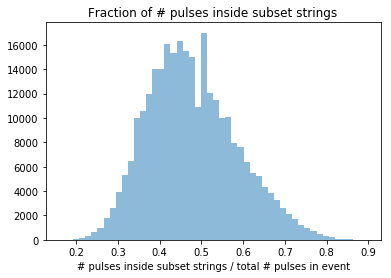

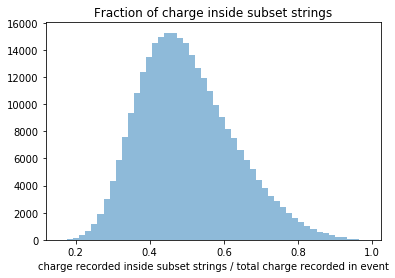

In [5]:
plt.figure()
plt.title("Fraction of # pulses inside subset strings")
plt.hist(fraction_count_inside,bins=50,alpha=0.5);
plt.xlabel("# pulses inside subset strings / total # pulses in event")

plt.figure()
plt.title("Fraction of charge inside subset strings")
plt.hist(fraction_charge_inside,bins=50,alpha=0.5);
plt.xlabel("charge recorded inside subset strings / total charge recorded in event")

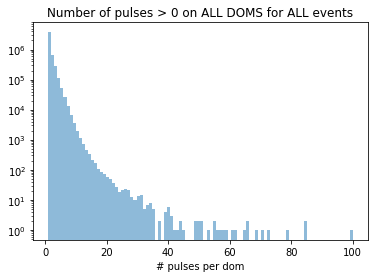

In [8]:
num_pulses_all = num_pulses[:,:,:,0].flatten()
gt0 = num_pulses_all > 0
plt.title("Number of pulses > 0 on ALL DOMS for ALL events")
plt.hist(num_pulses_all[gt0],bins=100,alpha=0.5);
plt.xlabel("# pulses per dom")
plt.yscale('log')

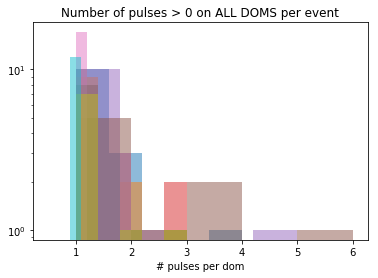

In [13]:
plt.figure()
for i in range(0,10):
    num_pulses_one_evt = num_pulses[i,:,:,0].flatten()
    gt0 = num_pulses_one_evt > 0
    plt.hist(num_pulses_one_evt[gt0],bins=5,alpha=0.5);
plt.title("Number of pulses > 0 on ALL DOMS per event")
plt.xlabel("# pulses per dom")
plt.yscale('log')

In [15]:
large_mask = num_pulses_all > 20
large_num = sum(num_pulses_all[large_mask])
fraction_large = large_num/len(num_pulses_all)

In [17]:
print(large_num, len(num_pulses_all),fraction_large*100)

(3317.0, 45679680, 0.007261434405845225)


In [21]:
num_pulses.index(100)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [9]:
def find_large_events(pulse_array,large_num):
    unique_event = []
    num_not_unique = 0
    for i in range(0,pulse_array.shape[0]):
        not_unique =0
        for j in range(0,pulse_array.shape[1]):
            for k in range(0,pulse_array.shape[2]):
                for l in range(0,pulse_array.shape[3]):
                    if pulse_array[i,j,k,l] > large_num:
                        if i not in unique_event:
                            unique_event.append(i)
                        else:
                            not_unique +=1
        if not_unique > 0:
            #print("Event %i has %i large events"%(i,(not_unique+1)))
            num_not_unique +=1
    return unique_event, num_not_unique
large_20, not_unique_20 = find_large_events(num_pulses,20) 

In [10]:
print(not_unique_20)
print(len(large_20))
print(len(large_20)/float(len(num_pulses_all))*100)

1
313
0.000226875513913


In [11]:
large_10, not_unique_10 = find_large_events(num_pulses,10) 

In [12]:
print(not_unique_10)
print(len(large_10))
print(len(large_10)/float(len(num_pulses_all))*100)

264
3336
0.00241807257001


In [13]:
large_5, not_unique_5 = find_large_events(num_pulses,5) 
print(not_unique_5)
print(len(large_5))
print(len(large_5)/float(len(num_pulses_all))*100)

11508
37527
0.0272011418869
